In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

from LatexConstants import *
from scipy.optimize import curve_fit

In [2]:
def normal(x, N, mu, sigma):
    return N*np.exp(-(x-mu)**2/(2*sigma**2)) 

In [3]:
run = '2124'
title = 'Centroid'
dir = '../test_alignment/histos/' + run + '/' + title

with open(dir + 'P0_RM1' + '.pkl', 'rb') as file:
    TMMCentroid = np.array(pickle.load(file))

with open(dir + 'P2_M01' + '.pkl', 'rb') as file:
    ExMeCentroid = np.array(pickle.load(file))

TMM_mean = TMMCentroid.mean()
ExMe_mean = ExMeCentroid[(ExMeCentroid>200) & (ExMeCentroid<230)].mean()
TMM_std = TMMCentroid.std()
ExMe_std = ExMeCentroid.std()

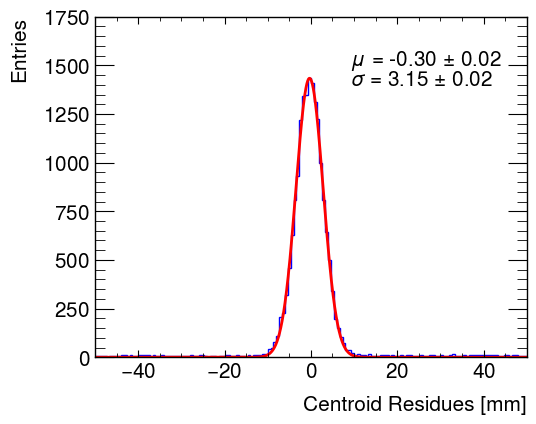

In [4]:
# plt.style.use(hep.style.CMS)
plt.style.use(hep.style.ATLAS)


res_name = '../test_alignment/histos/2124/Centroid ResiduesP0_RM1'+'.pkl'
with open(res_name, 'rb') as file:
    res = pickle.load(file)


plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)

n, bins, patches = plt.hist(res, bins=150, range=[-50,50], histtype = 'step', color = 'blue', lw = 1)
w = bins[1]-bins[0]
cent = [bin+0.5*w for bin in bins]

par, cov = curve_fit(normal, cent[0:-1], n)
x = np.linspace(-50,50, 5000)
plt.plot(x, normal(x, *par), color = 'red', lw = 2)


plt.ylabel("Entries", fontsize = fontsize)
plt.xlabel("Centroid Residues [mm]", fontsize = fontsize)
plt.xlim(-50,50)
plt.annotate(text = rf' $\mu$ = {par[1]:.2f} $\pm$ {np.sqrt(cov[1][1]):.2f}', xy = (8, 1.5*10**3), fontsize= fontsize)
plt.annotate(text = rf'$\sigma$ = {abs(par[2]):.2f} $\pm$ {np.sqrt(cov[2][2]):.2f}', xy = (9, 1.4*10**3), fontsize = fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)
# plt.legend()
# plt.savefig(f'../ThesisPlots/CentroidResidues{run}.pdf', dpi = 600)
# plt.savefig(f'../ThesisPlots/CentroidResidues{run}.png', dpi = 600)
plt.show()